In [3]:
%matplotlib inline

# Big
## Bigish
### Medium

*italic*
**bold**

normal

- option 1
- option 2

`code!`

### Part 1: Vehicle stop and arrest per location

Here we will visualize the frequency of vehicle stops by region in San Diego. We use geopandas to process the geographical data and assign our arrest/stop information to the different areas in San Diego.

Our python file obtains the amount of stops and arrests for each police beat, and then assigns each beat to a county division. We then use darker colors to indicate a higher frequency and lighter colors to indicate lower frequencies.

In [1]:
import stop_arrest_correlation_gis

In [2]:
divsums_stop, divsums_arrest = stop_arrest_correlation_gis.create_data()

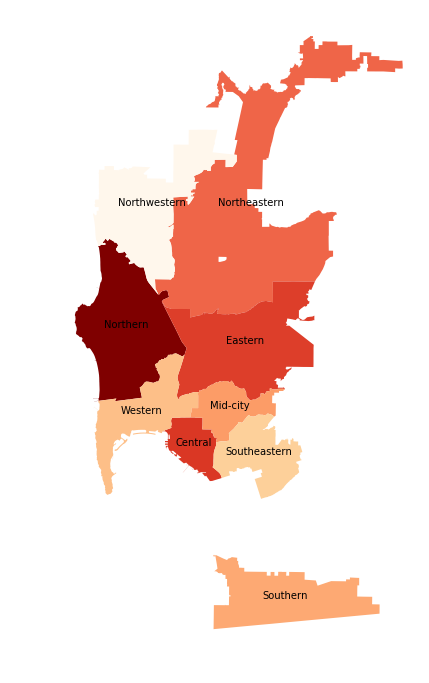

In [13]:
ax = divsums_stop.plot(column='arrested', figsize=(30, 12), cmap='OrRd')
divsums_stop.apply(lambda x: ax.annotate(s=x.div_name.capitalize(), xy=x.geometry.centroid.coords[0], ha='center'),axis=1)
ax.set_axis_off()

As evident by the map, the Northern section of San Diego contains a higher amount of vehicle stops. This could be caused by many different factors, such as a higher amount of traffic.

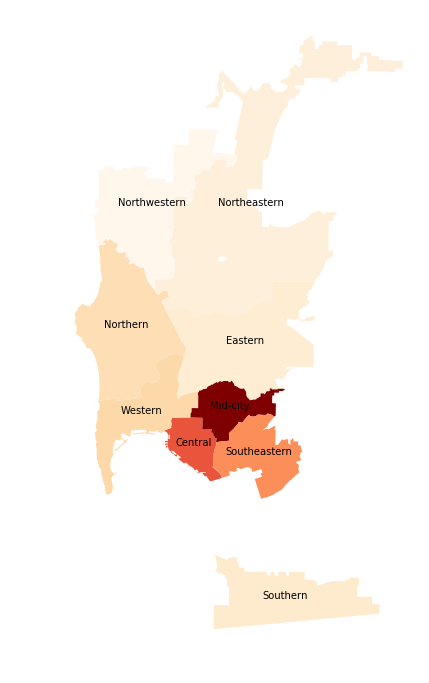

In [14]:
ax = divsums_arrest.plot(column='arrested', figsize=(30, 12), cmap='OrRd')
divsums_arrest.apply(lambda x: ax.annotate(s=x.div_name.capitalize(), xy=x.geometry.centroid.coords[0], ha='center'),axis=1)
ax.set_axis_off()

Once we analize the **probability** of arrest given that the vehicle can be stopped, we see a radical shift in frequency. Mid-city San Diego has a much higher probability of arrest. According to the San Diego Union-Tribune, this area is one of the most ethnically diverse places in the country. Racial bias might be a component as to why this is happening.

### Part 2: Time and stop number

In this part, we will visualize the the result of vihecle stops as well as the relationship between time and number of stops. 

We first cleaned the original data and classified the results of stops into 7 classes. And then we used stacked bars plot to show how those stops distribute in the total number of stops To make the results distribution more clear, we utilized line plot to show the ratio each result takes up. 
For the time relationship, we took advantage of bars to clarify the relationship between week and number, month and number, time period and number.

In [11]:
import Time_StopNumber
import numpy as np
import matplotlib.pyplot as plt

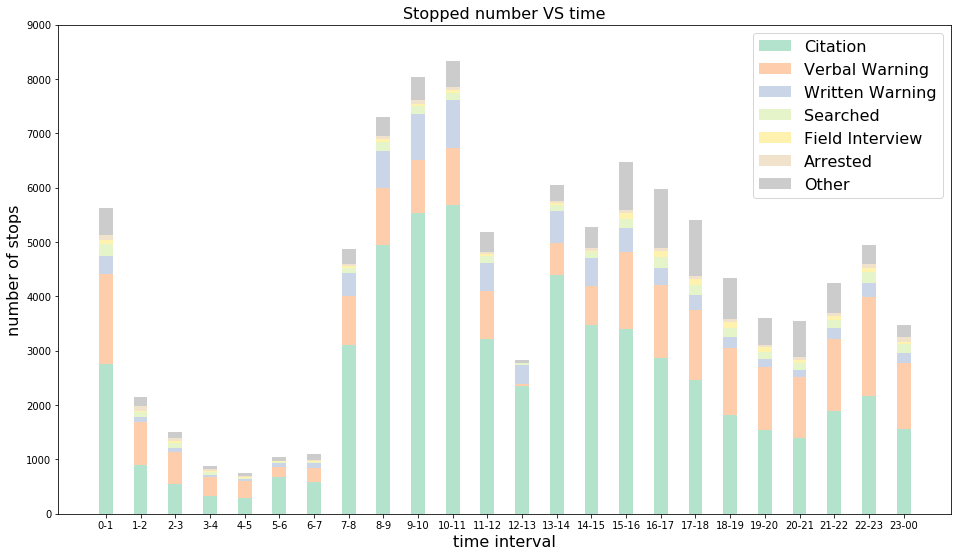

In [12]:
data = Time_StopNumber.TimeInterval_StopNumber()
columns = ['0-1', '1-2', '2-3', '3-4', '4-5', '5-6', '6-7', '7-8', '8-9', '9-10', '10-11', '11-12', '12-13', '13-14', '14-15', '15-16', '16-17', '17-18', '18-19', '19-20', '20-21', '21-22', '22-23', '23-00']
rows = ["Citation", "Verbal Warning", "Written Warning", "Searched", "Field Interview","Arrested","Other"]

values = np.arange(0, 10000, 1000)
value_incr = 1
colors = plt.cm.Pastel2(np.linspace(0, 1, len(rows)))
index = np.arange(len(columns)) + 1
bar_width = 0.4
y_offset = np.zeros(len(columns))

for row in range(len(data)):
    plt.bar(index, data[row], bar_width, bottom=y_offset, color=colors[row], label=rows[row])
    y_offset = y_offset + data[row]
    
plt.ylabel("number of stops", fontsize=16)
plt.xlabel("time interval", fontsize=16)
plt.yticks(values * value_incr, ['%d' % val for val in values])
plt.xticks(index, columns, fontsize=10)
plt.title('Stopped number VS time',fontsize=16)
plt.legend(prop={'size':16})
fig = plt.gcf()
fig.set_size_inches(16, 9)

As is shown in the picture, time period from **8:00-11:00** is the most likely time period to be stopped in a day. This may be due to the high volume of traffic of going to work.

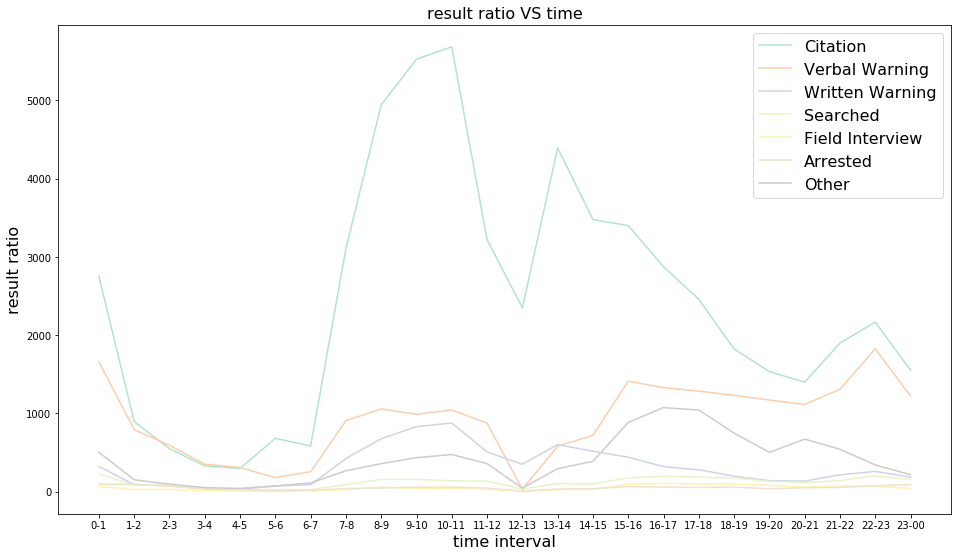

In [13]:
data_ratio = Time_StopNumber.TimeInterval_ResultRatio()
columns = ['0-1', '1-2', '2-3', '3-4', '4-5', '5-6', '6-7', '7-8', '8-9', '9-10', '10-11', '11-12', '12-13', '13-14', '14-15', '15-16', '16-17', '17-18', '18-19', '19-20', '20-21', '21-22', '22-23', '23-00']
rows = ["Citation", "Verbal Warning", "Written Warning", "Searched", "Field Interview","Arrested","Other"]

colors = plt.cm.Pastel2(np.linspace(0, 1, len(rows)))
index = np.arange(len(columns)) + 1
bar_width = 0.4
y_offset = np.zeros(len(columns))

for row in range(len(data_ratio)):
    plt.plot(index, data[row], color=colors[row], label=rows[row])
    
plt.ylabel("result ratio", fontsize=16)
plt.xlabel("time interval", fontsize=16)
plt.xticks(index, columns, fontsize=10)
plt.title('result ratio VS time',fontsize=16)
plt.legend(prop={'size':16})
fig = plt.gcf()
fig.set_size_inches(16, 9)

The most common result is **Citation**, which ususlly takes more than 60 precents of stops per time interval. The second common result is **Verbal Waring**. Serious results ratio like **Searched, Arrested** is very low.

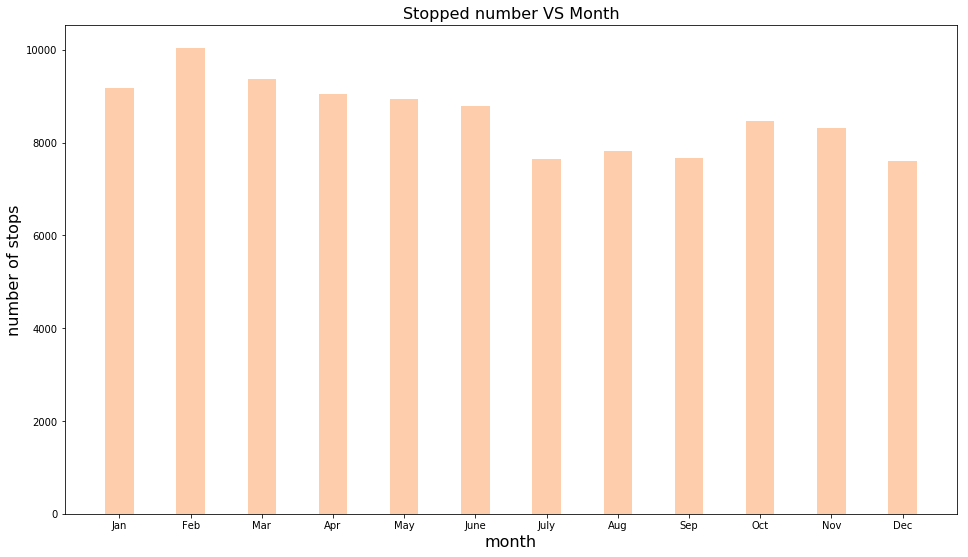

In [14]:
data = Time_StopNumber.month_StopNumber()
columns = ["Jan", "Feb", "Mar", "Apr", "May", "June", "July", "Aug", "Sep","Oct", "Nov", "Dec"]
index = np.arange(len(columns)) + 1
bar_width = 0.4
plt.bar(index, data, bar_width, color=plt.cm.Pastel2(0.2), label=columns)
plt.ylabel("number of stops", fontsize=16)
plt.xlabel("month", fontsize=16)
plt.xticks(index, columns, fontsize=10)
plt.title('Stopped number VS Month',fontsize=16)
fig = plt.gcf()
fig.set_size_inches(16, 9)

As is show in the picture, there is no obvious stop number difference among months. **Febuary** is relatively higher than other months.

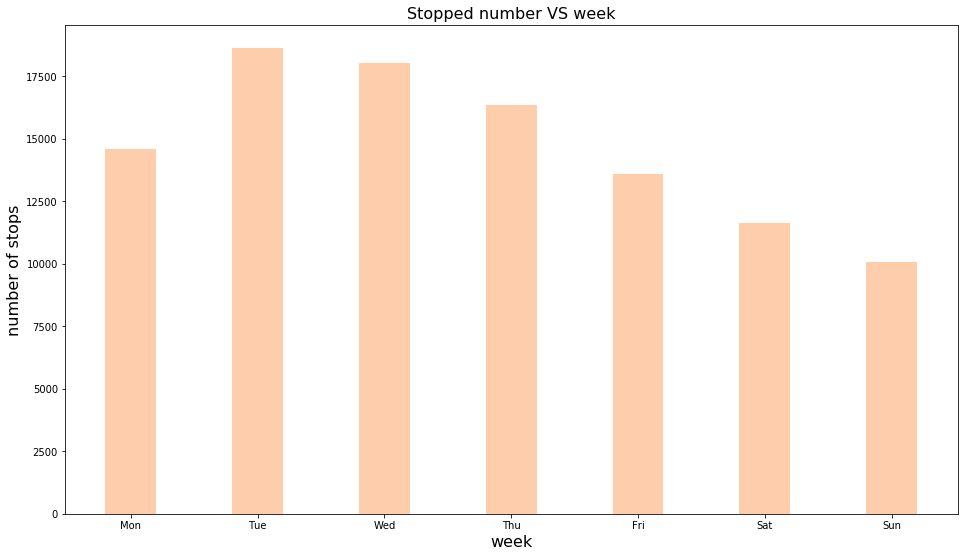

In [15]:
data = Time_StopNumber.week_StopNumber()
columns = ["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"]
index = np.arange(len(columns)) + 1
bar_width = 0.4
plt.bar(index, data, bar_width, color=plt.cm.Pastel2(0.2), label=columns)
plt.ylabel("number of stops", fontsize=16)
plt.xlabel("week", fontsize=16)
plt.xticks(index, columns, fontsize=10)
plt.title('Stopped number VS week',fontsize=16)
fig = plt.gcf()
fig.set_size_inches(16, 9)

This picture shows that stop number in **weekday** is **30%-80%** more than the stop number in **weekend**

# Part 4 Age, Gender and Searched Probability

Generally, in this part, we will focus on the correlation among age, gender and the probability of being searched when people are stopped.

- First obtained the clean dataset of three columns: *subject_sex*, *subject_age* and *searched*.
- Second draw the distribution of stop times in terms of age and gender.
- Third draw the distribution of searched times in terms of age and gender.
- Finally draw the distribution of searched probability if stopped by calculating the ratio of searched times to stopped times.


In [24]:
import ags#data cleaning included when ploting
from collections import defaultdict
from matplotlib.pylab import subplots
import matplotlib.pyplot as plt

In [25]:
#Draw the distribution of stop times in terms of age and gender.
male_stopped_array, female_stopped_array = ags.create_data(mode='stopped')
fig,ax=subplots()
ax.plot(male_stopped_array[0],male_stopped_array[1],female_stopped_array[0],female_stopped_array[1])
ax.legend(('Male','Female'),loc='best')
plt.xlabel('Age')
plt.ylabel('Stopped Times')
fig.set_size_inches(16, 9)

TypeError: create_data() missing 1 required positional argument: 'dataset'

Column names are stop_id, stop_cause, service_area, subject_race, subject_sex, subject_age, timestamp, stop_date, stop_time, sd_resident, arrested, searched, obtained_consent, contraband_found, property_seized
Processed 103051 lines.
23109 emty lines.


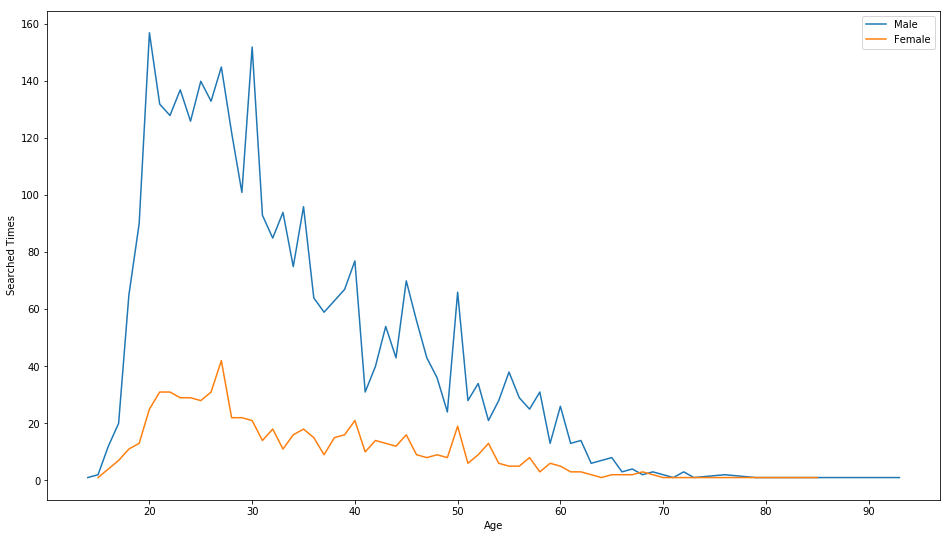

In [21]:
#Draw the distribution of searched times in terms of age and gender.
male_searched_array, female_searched_array = ags.plot_data(pic='searched')
fig,ax=subplots()
ax.plot(male_searched_array[0],male_searched_array[1],female_searched_array[0],female_searched_array[1])
ax.legend(('Male','Female'),loc='best')
plt.xlabel('Age')
plt.ylabel('Searched Times')
fig.set_size_inches(16, 9)